<a href="https://colab.research.google.com/github/wkt84/emt-python/blob/master/notebook/ippaku02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 順方向計算の実装

In [0]:
class Linear:
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(out_size, in_size)
        self.b = np.zeros(out_size)
        
    def forward(self, x):
        return x.dot(self.W.T) + self.b

In [0]:
class ReLU:
    def forward(self, x):
        return np.maximum(0,x)

In [0]:
class Sigmoid:
    def forward(self, x):
        return 1/(1+np.exp(-x))

In [0]:
def softmax(x):
    m = np.max(x, axis=1)
    m2 = m.reshape(x.shape[0], 1)
    exp_m = np.exp((x-m2))
    return (exp_m.T/np.sum(exp_m.T, axis=0)).T

In [0]:
def softmax_cross_entropy_gy(x, t):
    m = np.max(x, axis=1)
    m2 = m.reshape(x.shape[0], 1)
    exp_m = np.exp((x-m2))
    return (exp_m.T/np.sum(exp_m.T, axis=0)).T - t

## 3層のニューラルネットワーク

In [0]:
layers = [
    Linear(784, 100),
    ReLU(),
    Linear(100, 100),
    ReLU(),
    Linear(100, 10),
]

Using TensorFlow backend.


(28, 28)


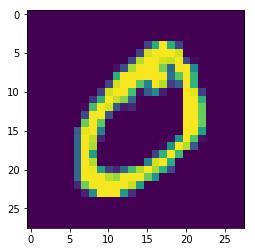

In [8]:
from keras.datasets import mnist
data = mnist.load_data()
data_1st = data[0][0][1]
print(data_1st.shape)
plt.imshow(data_1st)
plt.show()

(100, 28, 28)
(100, 784)


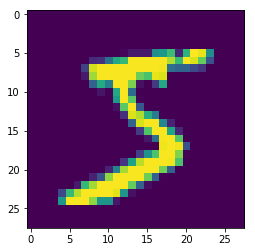

In [9]:
data_100 = data[0][0][:100]
print(data_100.shape)
data_100_1d = data_100.reshape(100, 784)
print(data_100_1d.shape)
plt.imshow(data_100_1d[0].reshape(28,28))
plt.show()

In [0]:
x = data_100_1d / 255.
for layer in layers:
    x = layer.forward(x)
x = softmax(x)

## 逆方向計算の実装

In [0]:
def softmax_cross_entropy_gy(x, t):
    m = np.max(x, axis=1)
    m2 = m.reshape(x.shape[0], 1)
    exp_m = np.exp((x-m2))
    return (exp_m.T/np.sum(exp_m.T, axis=0)).T - t

In [0]:
class Linear:
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(out_size, in_size) * np.sqrt(2 / in_size)
        self.b = np.zeros(out_size)
        
    def forward(self, x):
        self.x = x
        return x.dot(self.W.T) + self.b
    
    def update(self, gy, lr):
        self.W -= lr * gy.T.dot(self.x)
        self.b -= lr * gy.sum(axis=0)
        return gy.dot(self.W)

In [0]:
class ReLU:
    def forward(self, x):
        self.x = x
        return np.maximum(0,x)
    
    def update(self, gy, lr):
        return gy * (self.x > 0)

In [0]:
class Sigmoid:
    def forward(self, x):
        self.x = x
        self.y = 1/(1+np.exp(-x))
        return self.y
    
    def update(self, gy, lr):
        return gy * self.y * (1 - self.y)

## データの生成

In [91]:
from keras.datasets import mnist
((train_data, train_label), (test_data, test_label)) = mnist.load_data()

print(train_data.shape)
print(train_label.shape)

(60000, 28, 28)
(60000,)


正解:  9


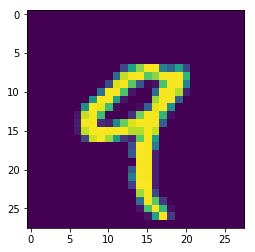

In [92]:
num = 4
print('正解: ', train_label[num])
plt.imshow(train_data[num])

In [0]:
train_1d = train_data.reshape(60000, 784) / 255.

In [0]:
train_1hot = np.array([train_label == i for i in range(10)]).astype(np.int).T

## 順方向、逆方向の計算

In [0]:
model = [
    Linear(784, 100),
    ReLU(),
    Linear(100, 100),
    ReLU(),
    Linear(100, 10),
]

In [0]:
def forward(model, x):
    for layer in model:
        x = layer.forward(x)
    return x

def update(layers, gy, lr=0.0001):
    for layer in reversed(model):
        gy = layer.update(gy, lr)

1epochめの学習が終了しました
精度: 92.27499999999999%
2epochめの学習が終了しました
精度: 92.82166666666667%
3epochめの学習が終了しました
精度: 93.28999999999999%
4epochめの学習が終了しました
精度: 93.65666666666667%
5epochめの学習が終了しました
精度: 93.965%
6epochめの学習が終了しました
精度: 94.22833333333334%
7epochめの学習が終了しました
精度: 94.49833333333333%
8epochめの学習が終了しました
精度: 94.73333333333333%
9epochめの学習が終了しました
精度: 94.935%
10epochめの学習が終了しました
精度: 95.145%
11epochめの学習が終了しました
精度: 95.33%
12epochめの学習が終了しました
精度: 95.49166666666666%
13epochめの学習が終了しました
精度: 95.63333333333334%
14epochめの学習が終了しました
精度: 95.785%
15epochめの学習が終了しました
精度: 95.92333333333333%
16epochめの学習が終了しました
精度: 96.04333333333334%
17epochめの学習が終了しました
精度: 96.15333333333334%
18epochめの学習が終了しました
精度: 96.26333333333334%
19epochめの学習が終了しました
精度: 96.37666666666667%
20epochめの学習が終了しました
精度: 96.47%


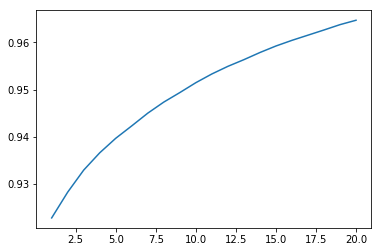

In [98]:
mini_batch = 128
num_of_epoch = 20
accuracy = []
ep = []
for epoch in range(num_of_epoch):
    for i in range(0, len(train_1d), mini_batch):
        x, t = train_1d[i:i + mini_batch], train_1hot[i:i + mini_batch]
        y = forward(model, x)
        gy = softmax_cross_entropy_gy(y, t)
        update(model, gy)
    print(str(epoch+1)+'epochめの学習が終了しました')
    #精度の算出
    y = forward(model, train_1d)
    n_correct = np.sum(train_1hot[np.arange(len(train_1hot)), y.argmax(axis=1)])
    acc = n_correct / float(len(train_1hot))
    accuracy.append(acc)
    ep.append(epoch+1)
    print('精度: '+str(acc*100)+'%')
plt.plot(ep,accuracy)

正解label: 2
予測label: 2


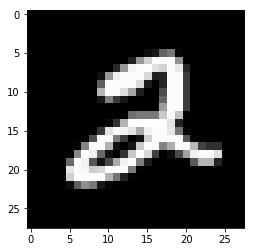

In [101]:
data_number = 5
y = forward(model, train_1d[data_number])
plt.imshow(train_1d[data_number].reshape(28,28), 'gray')
print('正解label: '+str(train_1hot[data_number].argmax()))
print('予測label: '+str(y.argmax()))

In [0]:
fault = []
for i in range(len(train_1d)):
    y = forward(model, train_1d[i])
    if train_1hot[i].argmax() != y.argmax():
        fault.append(i)

正解label: 1
予測label: 3


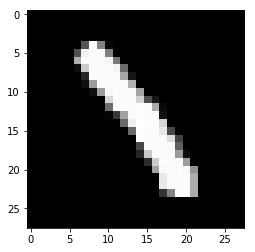

In [105]:
miss_num = 3
y = forward(model, train_1d[fault[miss_num]])
plt.imshow(train_1d[fault[miss_num]].reshape(28,28), 'gray')
print('正解label: '+str(train_1hot[fault[miss_num]].argmax()))
print('予測label: '+str(y.argmax()))

In [0]:
test_1d = test_data.reshape(10000, 784) / 255.
test_1hot = np.array([test_label == i for i in range(10)]).astype(np.int).T

In [110]:
y = forward(model, test_1d)
n_correct = np.sum(test_1hot[np.arange(len(test_1hot)), y.argmax(axis=1)])
acc = n_correct / float(len(test_1hot))
print(acc)

0.9599
